In [1]:
# Python
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load data
data = pd.read_excel(r"C:\Users\Admin\WORK\Time_series_analysis\data\task_1_2.xlsx", sheet_name="Timeseries")
data = data.rename(columns={'Date': 'ds', 'series1': 'y'})
data['ds'] = pd.to_datetime(data['ds'])                        # change to datetime object (datetime64)
                              

In [ ]:
# data.iloc[1635]

ds    2019-06-24 00:00:00
y             4401.843563
Name: 1635, dtype: object

In [10]:
print(data.tail())
print(data.info())

             ds            y
1637 2019-06-26  4007.059387
1638 2019-06-27  4836.106157
1639 2019-06-28  4895.323783
1640 2019-06-29  4086.016222
1641 2019-06-30  3572.796793
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1642 non-null   datetime64[ns]
 1   y       1642 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.8 KB
None


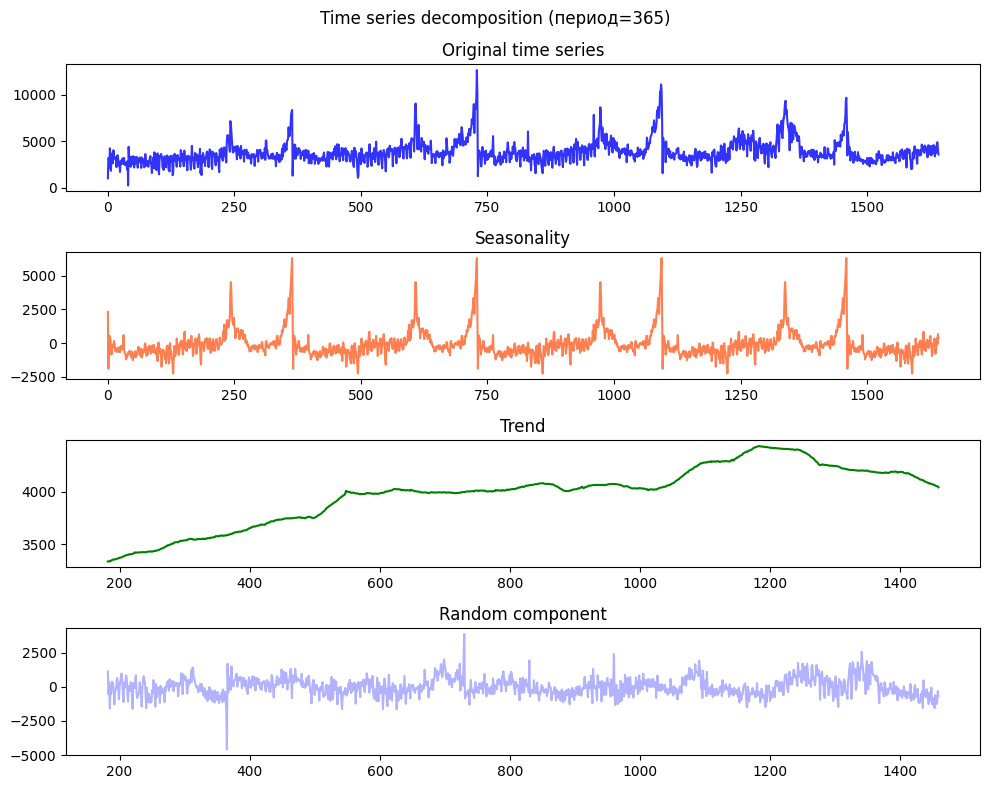

In [ ]:
# def decompose(series, period):
#     decomposition = seasonal_decompose(series, period=period, model='additive')
    
#     fig, axs = plt.subplots(4, 1, figsize=(10, 8))

#     axs[0].plot(series, color='blue', alpha=0.8)
#     axs[0].set_title('Original time series')

#     axs[1].plot(decomposition.seasonal, color='coral')
#     axs[1].set_title('Seasonality')

#     axs[2].plot(decomposition.trend, color='green')
#     axs[2].set_title('Trend')

#     axs[3].plot(decomposition.resid, color='blue', alpha=0.3)
#     axs[3].set_title('Random component')

#     plt.suptitle(f"Time series decomposition (период={period})")
#     plt.tight_layout()
#     plt.show()


# decompose(data.y, period=365)

In [4]:
data_train = data[data["ds"] <= "2019-04"]
data_test = data[data["ds"] > "2019-04"]
print(len(data_train), len(data_test))


1552 90


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(data['ds'], data['y'])
# plt.title('Time series')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()

In [45]:
model_1 = Prophet(interval_width=0.95)     # default
model_1.fit(data_train)

model_2 = Prophet(                         # with Hyperparameter tuning
    interval_width=0.95,
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.1,
    )
model_2.fit(data_train)

model_3 = Prophet(
    interval_width=0.95,
    changepoint_prior_scale=0.001,
    seasonality_prior_scale=0.1,
    )
model_3.fit(data_train)




17:49:49 - cmdstanpy - INFO - Chain [1] start processing
17:49:49 - cmdstanpy - INFO - Chain [1] done processing
17:49:49 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing
17:49:50 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
#create dataframe for test p
future_dates = model_1.make_future_dataframe(periods=90, freq='D',include_history=True)
future_dates

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
1637,2019-06-26
1638,2019-06-27
1639,2019-06-28
1640,2019-06-29


In [46]:
forecast_1 = model_1.predict(future_dates)
forecast_2 = model_2.predict(future_dates)
forecast_3 = model_3.predict(future_dates)
print(forecast_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


             ds         yhat   yhat_lower   yhat_upper
0    2015-01-01  5102.013240  3653.944659  6689.332908
1    2015-01-02  4941.189754  3471.940410  6638.593591
2    2015-01-03  4399.775114  2785.012080  5857.633902
3    2015-01-04  3619.250937  2092.773051  5240.653108
4    2015-01-05  4313.018269  2841.129712  5839.904050
...         ...          ...          ...          ...
1637 2019-06-26  3298.306307  1761.966573  4805.424042
1638 2019-06-27  3272.128600  1821.140809  4879.577896
1639 2019-06-28  3282.980468  1731.542315  4841.300416
1640 2019-06-29  2922.371593  1340.994378  4532.504038
1641 2019-06-30  2329.058796   795.893857  3882.165692

[1642 rows x 4 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_12340\1540671861.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



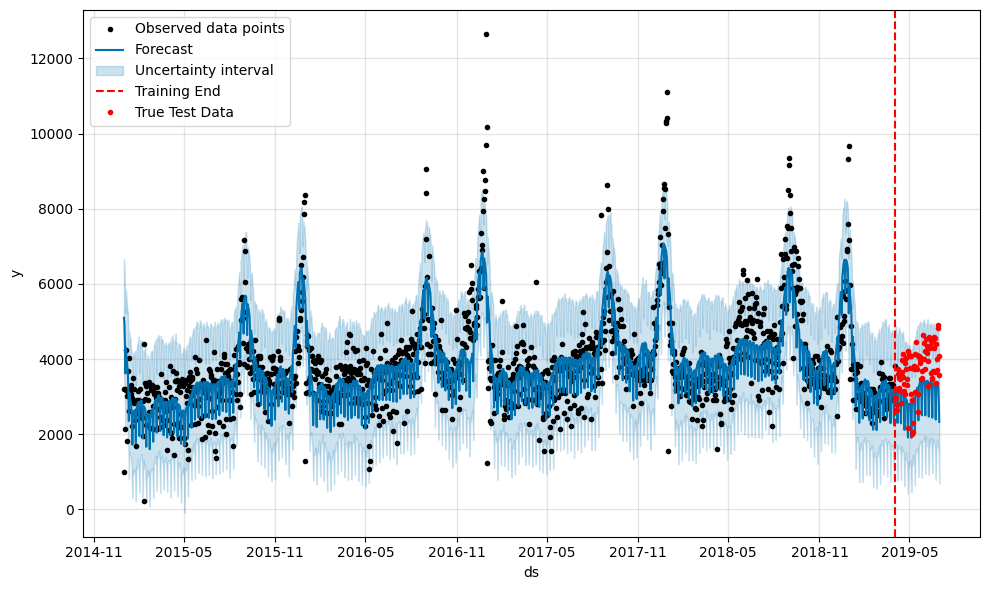

In [35]:
# plot train, test and predict data
forecast_plot = model_1.plot(forecast_1)
# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_1['ds'].iloc[-90]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')
# plot true test data for the period after the red line
data_test['ds'] = pd.to_datetime(data_test['ds'])
plt.plot(data_test['ds'], data_test['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12340\4237712034.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



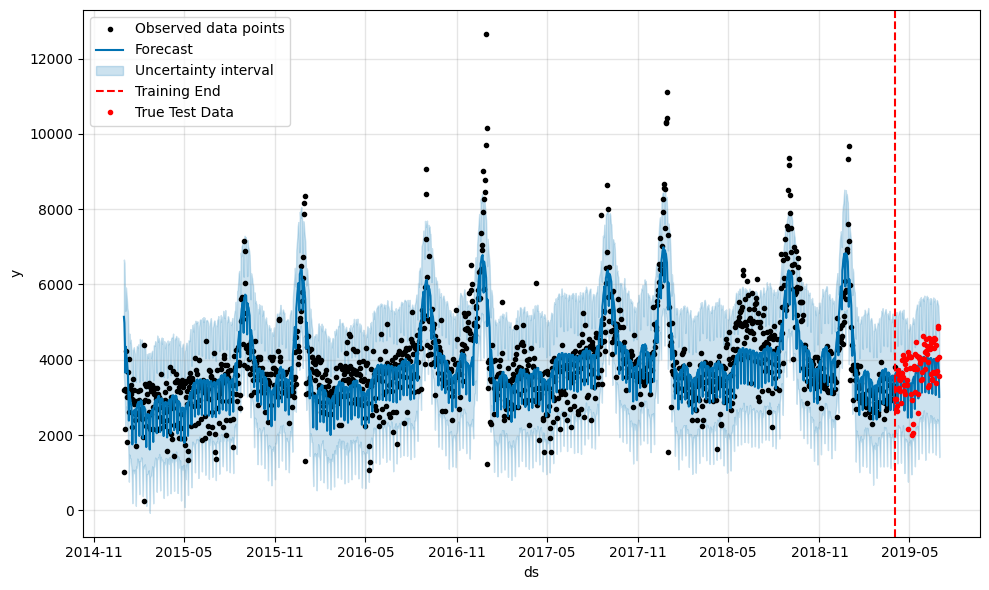

In [36]:
# plot train, test and predict data
forecast_plot = model_2.plot(forecast_2)
# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_2['ds'].iloc[-90]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')
# plot true test data for the period after the red line
data_test['ds'] = pd.to_datetime(data_test['ds'])
plt.plot(data_test['ds'], data_test['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12340\4214386758.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



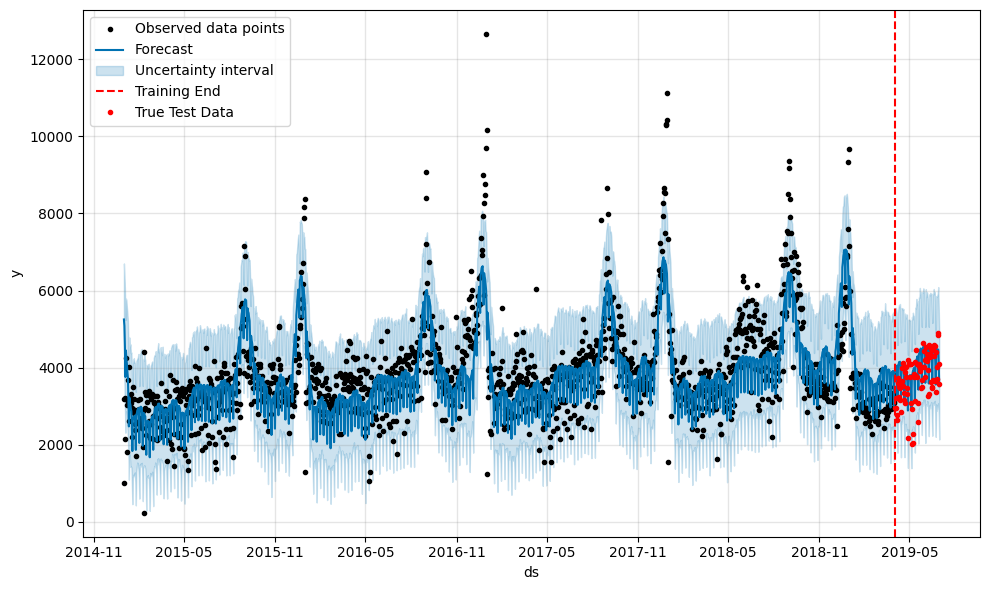

In [47]:
# plot train, test and predict data
forecast_plot = model_3.plot(forecast_3)
# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_3['ds'].iloc[-90]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')
# plot true test data for the period after the red line
data_test['ds'] = pd.to_datetime(data_test['ds'])
plt.plot(data_test['ds'], data_test['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

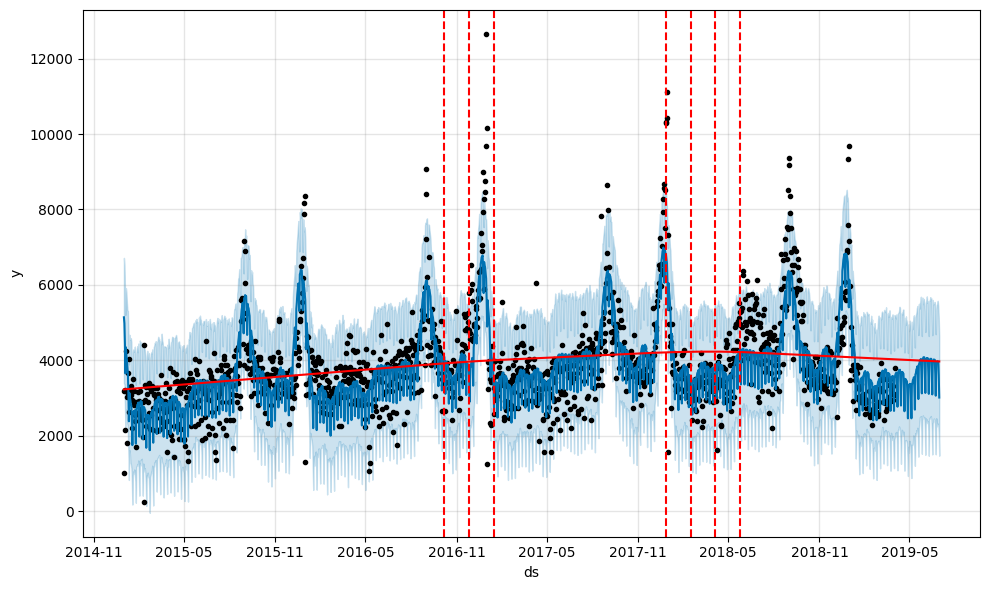

In [48]:
from prophet.plot import add_changepoints_to_plot
fig = model_2.plot(forecast_2)
a = add_changepoints_to_plot(fig.gca(), model_2, forecast_2)


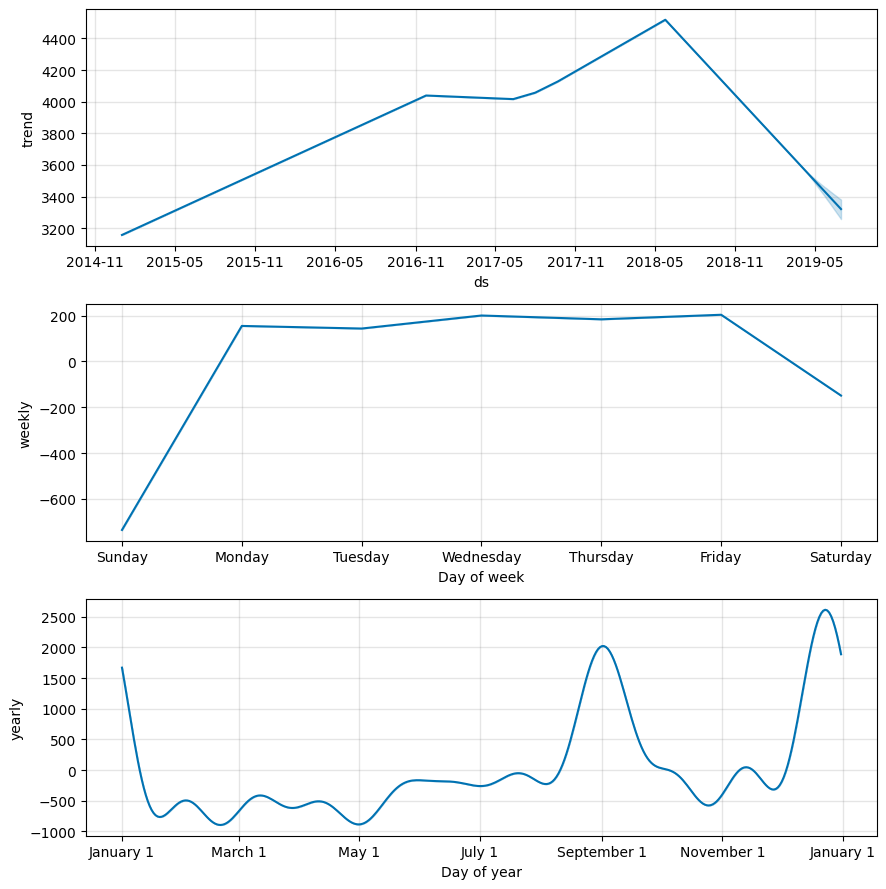

In [18]:
decompos = model_1.plot_components(forecast_1)




In [19]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_1, forecast_1)


In [122]:
data_cross_1 = cross_validation(model_1, initial='1095 days', period='90 days', horizon = '90 days')
data_cross_2 = cross_validation(model_2, initial='1095 days', period='90 days', horizon = '90 days')
data_cross_3 = cross_validation(model_3, initial='1095 days', period='90 days', horizon = '90 days')
data_cross_4 = cross_validation(model_4, initial='1095 days', period='90 days', horizon = '90 days')

  0%|          | 0/5 [00:00<?, ?it/s]

16:49:14 - cmdstanpy - INFO - Chain [1] start processing
16:49:15 - cmdstanpy - INFO - Chain [1] done processing
16:49:15 - cmdstanpy - INFO - Chain [1] start processing
16:49:15 - cmdstanpy - INFO - Chain [1] done processing
16:49:15 - cmdstanpy - INFO - Chain [1] start processing
16:49:15 - cmdstanpy - INFO - Chain [1] done processing
16:49:15 - cmdstanpy - INFO - Chain [1] start processing
16:49:15 - cmdstanpy - INFO - Chain [1] done processing
16:49:15 - cmdstanpy - INFO - Chain [1] start processing
16:49:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

16:49:16 - cmdstanpy - INFO - Chain [1] start processing
16:49:16 - cmdstanpy - INFO - Chain [1] done processing
16:49:16 - cmdstanpy - INFO - Chain [1] start processing
16:49:16 - cmdstanpy - INFO - Chain [1] done processing
16:49:16 - cmdstanpy - INFO - Chain [1] start processing
16:49:17 - cmdstanpy - INFO - Chain [1] done processing
16:49:17 - cmdstanpy - INFO - Chain [1] start processing
16:49:17 - cmdstanpy - INFO - Chain [1] done processing
16:49:17 - cmdstanpy - INFO - Chain [1] start processing
16:49:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

16:49:18 - cmdstanpy - INFO - Chain [1] start processing
16:49:18 - cmdstanpy - INFO - Chain [1] done processing
16:49:18 - cmdstanpy - INFO - Chain [1] start processing
16:49:18 - cmdstanpy - INFO - Chain [1] done processing
16:49:18 - cmdstanpy - INFO - Chain [1] start processing
16:49:18 - cmdstanpy - INFO - Chain [1] done processing
16:49:19 - cmdstanpy - INFO - Chain [1] start processing
16:49:19 - cmdstanpy - INFO - Chain [1] done processing
16:49:19 - cmdstanpy - INFO - Chain [1] start processing
16:49:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

16:49:19 - cmdstanpy - INFO - Chain [1] start processing
16:49:20 - cmdstanpy - INFO - Chain [1] done processing
16:49:20 - cmdstanpy - INFO - Chain [1] start processing
16:49:20 - cmdstanpy - INFO - Chain [1] done processing
16:49:20 - cmdstanpy - INFO - Chain [1] start processing
16:49:20 - cmdstanpy - INFO - Chain [1] done processing
16:49:20 - cmdstanpy - INFO - Chain [1] start processing
16:49:21 - cmdstanpy - INFO - Chain [1] done processing
16:49:21 - cmdstanpy - INFO - Chain [1] start processing
16:49:21 - cmdstanpy - INFO - Chain [1] done processing


In [123]:
data_cross_1[:]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-07,4141.873446,2688.893377,5693.683214,2743.750024,2018-01-06
1,2018-01-08,4929.716696,3382.862769,6458.009228,4974.280618,2018-01-06
2,2018-01-09,4801.251477,3287.600857,6418.719752,3691.232046,2018-01-06
3,2018-01-10,4671.780039,3156.222549,6150.534236,3632.014420,2018-01-06
4,2018-01-11,4501.113817,3132.767249,5988.042593,3868.884925,2018-01-06
...,...,...,...,...,...,...
445,2019-03-28,3921.702247,2225.161249,5488.051923,3316.187079,2019-01-01
446,2019-03-29,3953.350975,2206.864929,5505.067558,2941.142112,2019-01-01
447,2019-03-30,3560.793240,1842.133785,5168.440095,3079.316573,2019-01-01
448,2019-03-31,2958.565579,1351.720138,4472.431408,3118.794991,2019-01-01


C:\Users\Admin\AppData\Local\Temp\ipykernel_14860\1052025713.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



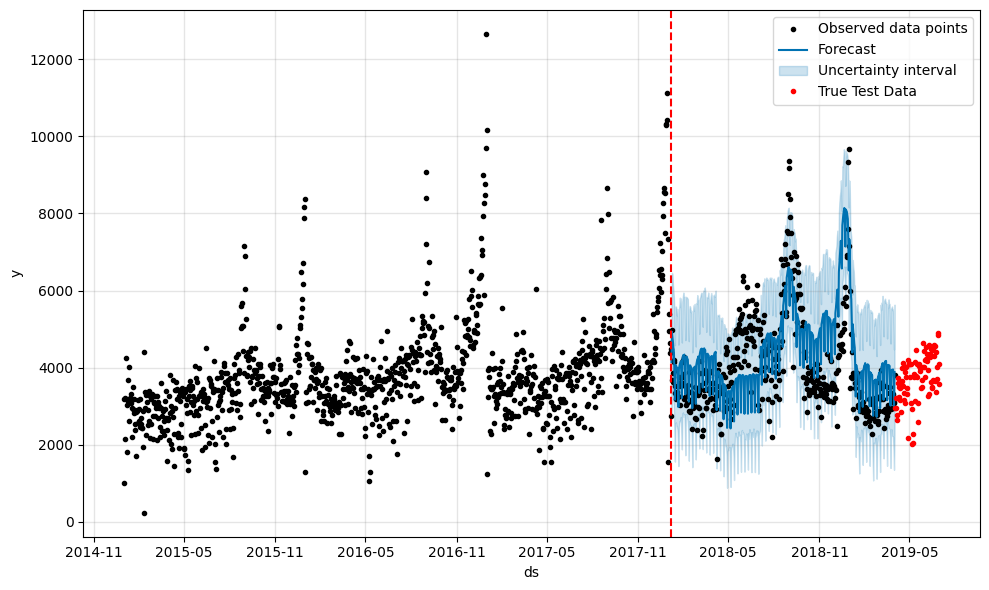

In [138]:
# plot train, test and predict data
forecast_plot = model_1.plot(data_cross_1)
# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = data_cross_1['ds'].iloc[-450]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='')
# plot true test data for the period after the red line
data_test['ds'] = pd.to_datetime(data_test['ds'])
plt.plot(data_test['ds'], data_test['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

In [ ]:
# mape = mean_absolute_percentage_error(data_test['y'], forecast['yhat'])

In [119]:

df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,729908.568562,854.346867,684.907456,0.175748,0.150178,0.158278,0.944444
1,10 days,765059.788551,874.676962,714.030263,0.178546,0.160628,0.163378,0.944444
2,11 days,831575.173387,911.907437,779.578565,0.193888,0.169016,0.179441,0.944444
3,12 days,701003.563768,837.259556,726.075328,0.179244,0.160628,0.169146,0.972222
4,13 days,696992.173787,834.860571,720.509124,0.177340,0.154098,0.169345,0.972222
...,...,...,...,...,...,...,...,...
77,86 days,865727.179416,930.444614,780.378064,0.231103,0.187220,0.199223,0.861111
78,87 days,941721.343770,970.423281,828.621878,0.247996,0.214460,0.212666,0.861111
79,88 days,981094.076211,990.501931,858.079104,0.256438,0.222643,0.220366,0.861111
80,89 days,890252.169291,943.531753,812.280051,0.241524,0.205648,0.208994,0.888889


In [ ]:
# from prophet.diagnostics import register_performance_metric, rolling_mean_by_h
# import numpy as np
# @register_performance_metric
# def mase(df, w):
#     """Mean absolute scale error

#         Parameters
#         ----------
#         df: Cross-validation results dataframe.
#         w: Aggregation window size.

#         Returns
#         -------
#         Dataframe with columns horizon and mase.
#     """
#     e = (df['y'] - df['yhat'])
#     d = np.abs(np.diff(df['y'])).sum()/(df['y'].shape[0]-1)
#     se = np.abs(e/d)
#     if w < 0:
#         return pd.DataFrame({'horizon': df['horizon'], 'mase': se})
#     return rolling_mean_by_h(
#         x=se.values, h=df['horizon'].values, w=w, name='mase'
#     )

# df_mase = performance_metrics(df_cv, metrics=['mase'])
# df_mase.head()

c:\Users\Admin\WORK\Time_series_analysis\a1_venv\lib\site-packages\prophet\plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

c:\Users\Admin\WORK\Time_series_analysis\a1_venv\lib\site-packages\prophet\plot.py:548: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



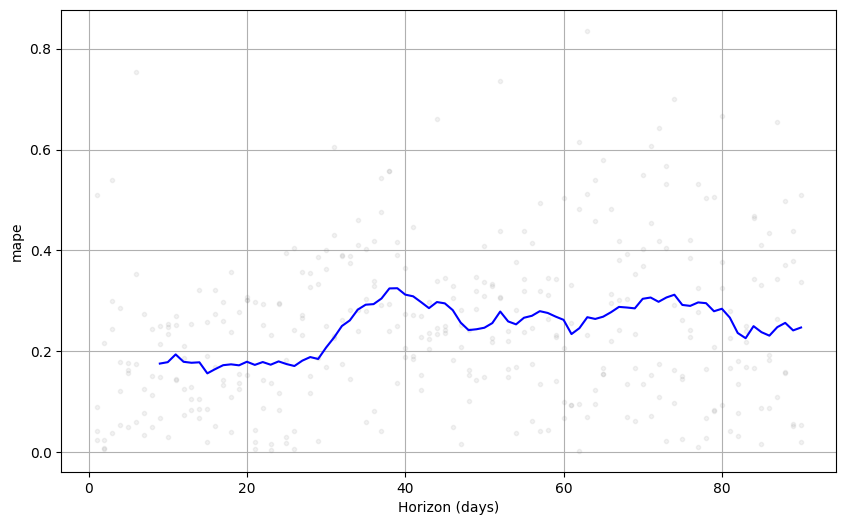

In [121]:

fig = plot_cross_validation_metric(df_cv, metric='mape')



In [111]:
cmp_df = forecast_1.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(data.set_index('ds'))
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2015-01-01,5102.013240,3572.962848,6703.739907,1006.699649
2015-01-02,4941.189754,3503.098625,6437.358598,3197.751826
2015-01-03,4399.775114,2831.468403,5941.409382,3217.491035
2015-01-04,3619.250937,2067.432923,5143.891497,2151.573759
2015-01-05,4313.018269,2712.121428,5929.350720,4243.929892
...,...,...,...,...
2019-06-26,3298.306307,1717.870737,4797.083185,4007.059387
2019-06-27,3272.128600,1633.131957,4689.148198,4836.106157
2019-06-28,3282.980468,1759.222335,4828.072076,4895.323783


In [ ]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-90:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-90:]['e'])))


                   yhat   yhat_lower   yhat_upper            y            e  \
ds                                                                            
2015-01-01  5102.013240  3572.962848  6703.739907  1006.699649 -4095.313591   
2015-01-02  4941.189754  3503.098625  6437.358598  3197.751826 -1743.437928   
2015-01-03  4399.775114  2831.468403  5941.409382  3217.491035 -1182.284079   
2015-01-04  3619.250937  2067.432923  5143.891497  2151.573759 -1467.677178   
2015-01-05  4313.018269  2712.121428  5929.350720  4243.929892   -69.088376   
...                 ...          ...          ...          ...          ...   
2019-06-26  3298.306307  1717.870737  4797.083185  4007.059387   708.753079   
2019-06-27  3272.128600  1633.131957  4689.148198  4836.106157  1563.977557   
2019-06-28  3282.980468  1759.222335  4828.072076  4895.323783  1612.343315   
2019-06-29  2922.371593  1417.500592  4452.920744  4086.016222  1163.644629   
2019-06-30  2329.058796   776.380330  3929.588052  3